In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error  # 루트 제곱 평균 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv"
data = pd.read_csv(file_url, skipinitialspace=True)
data.shape

(48842, 14)

In [5]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data["class"].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
data["class"].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [9]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data.describe(include="all")

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 전처리 : 범주형 데이터 처리

In [11]:
data["class"] = data["class"].map({"<=50K": 0, ">50K": 1})

In [12]:
data["class"].head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [13]:
data["age"].dtype

dtype('int64')

In [14]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [16]:
obj_list = []
for i in data.columns:
  # print(i, data[i].dtype)
  if data[i].dtype == "object":
    obj_list.append(i)
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [18]:
for i in obj_list:
  print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [19]:
for i in obj_list:
  if data[i].nunique() >= 10:
    print(i, data[i].nunique())

education 16
occupation 14
native-country 41


In [20]:
data["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [23]:
import numpy as np

In [24]:
np.sort(data["education-num"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [25]:
data["education-num"] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education-num, Length: 48842, dtype: bool

In [26]:
data[data["education-num"] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [28]:
data[data["education-num"] == 1]["education"].unique()

array(['Preschool'], dtype=object)

In [29]:
for i in np.sort(data["education-num"].unique()):
    print(i, data[data["education-num"] == i]["education"].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [30]:
data.drop("education", axis=1, inplace=True)

In [32]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [33]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [34]:
data["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [41]:
country_group = data.groupby("native-country")["class"].mean()

In [42]:
country_group.head()

native-country
Cambodia    0.321429
Canada      0.346154
China       0.295082
Columbia    0.047059
Cuba        0.246377
Name: class, dtype: float64

In [44]:
country_group = country_group.reset_index()

In [45]:
country_group.head()

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377


In [46]:
country_group.shape

(41, 2)

In [48]:
data = data.merge(country_group, on="native-country", how="left")

In [49]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977


In [50]:
data.drop("native-country", axis=1, inplace=True)

In [51]:
data = data.rename(columns={"class_x" : "class", "class_y" : "native-country"})

In [52]:
data.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977


# 전처리 : 결측치

In [53]:
data.isna().mean() * 100

age               0.000000
workclass         5.730724
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    1.754637
dtype: float64

In [54]:
data["native-country"] = data["native-country"].fillna(-99)

In [55]:
data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [56]:
data["workclass"] = data["workclass"].fillna("Private")

In [57]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [58]:
data["occupation"] = data["occupation"].fillna("Unknown")

In [59]:
data.isna().mean() * 100

age               0.0
workclass         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
class             0.0
native-country    0.0
dtype: float64

# 전처리 : 범주형 => 숫치로 형변화

In [60]:
data = pd.get_dummies(data, drop_first=True)

In [61]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,9,0,0,50,0,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,12,0,0,40,1,0.243977,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,10,7688,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,10,0,0,30,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [62]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("class", axis=1), data["class"], test_size=0.3, random_state=30)

In [63]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred = model.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.8204463249846448

In [66]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Train score: ", accuracy_score(y_train, train_pred), "Test score: ", accuracy_score(y_test, test_pred))

Train score:  0.9761034250782415 Test score:  0.8194908892376987


In [67]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(
    "Train score: ",
    accuracy_score(y_train, train_pred),
    "Test score: ",
    accuracy_score(y_test, test_pred),
)

Train score:  0.8552165901313288 Test score:  0.8492458882140176


In [68]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(
    "Train score: ",
    accuracy_score(y_train, train_pred),
    "Test score: ",
    accuracy_score(y_test, test_pred),
)

Train score:  0.8636111029863406 Test score:  0.8512250051184058


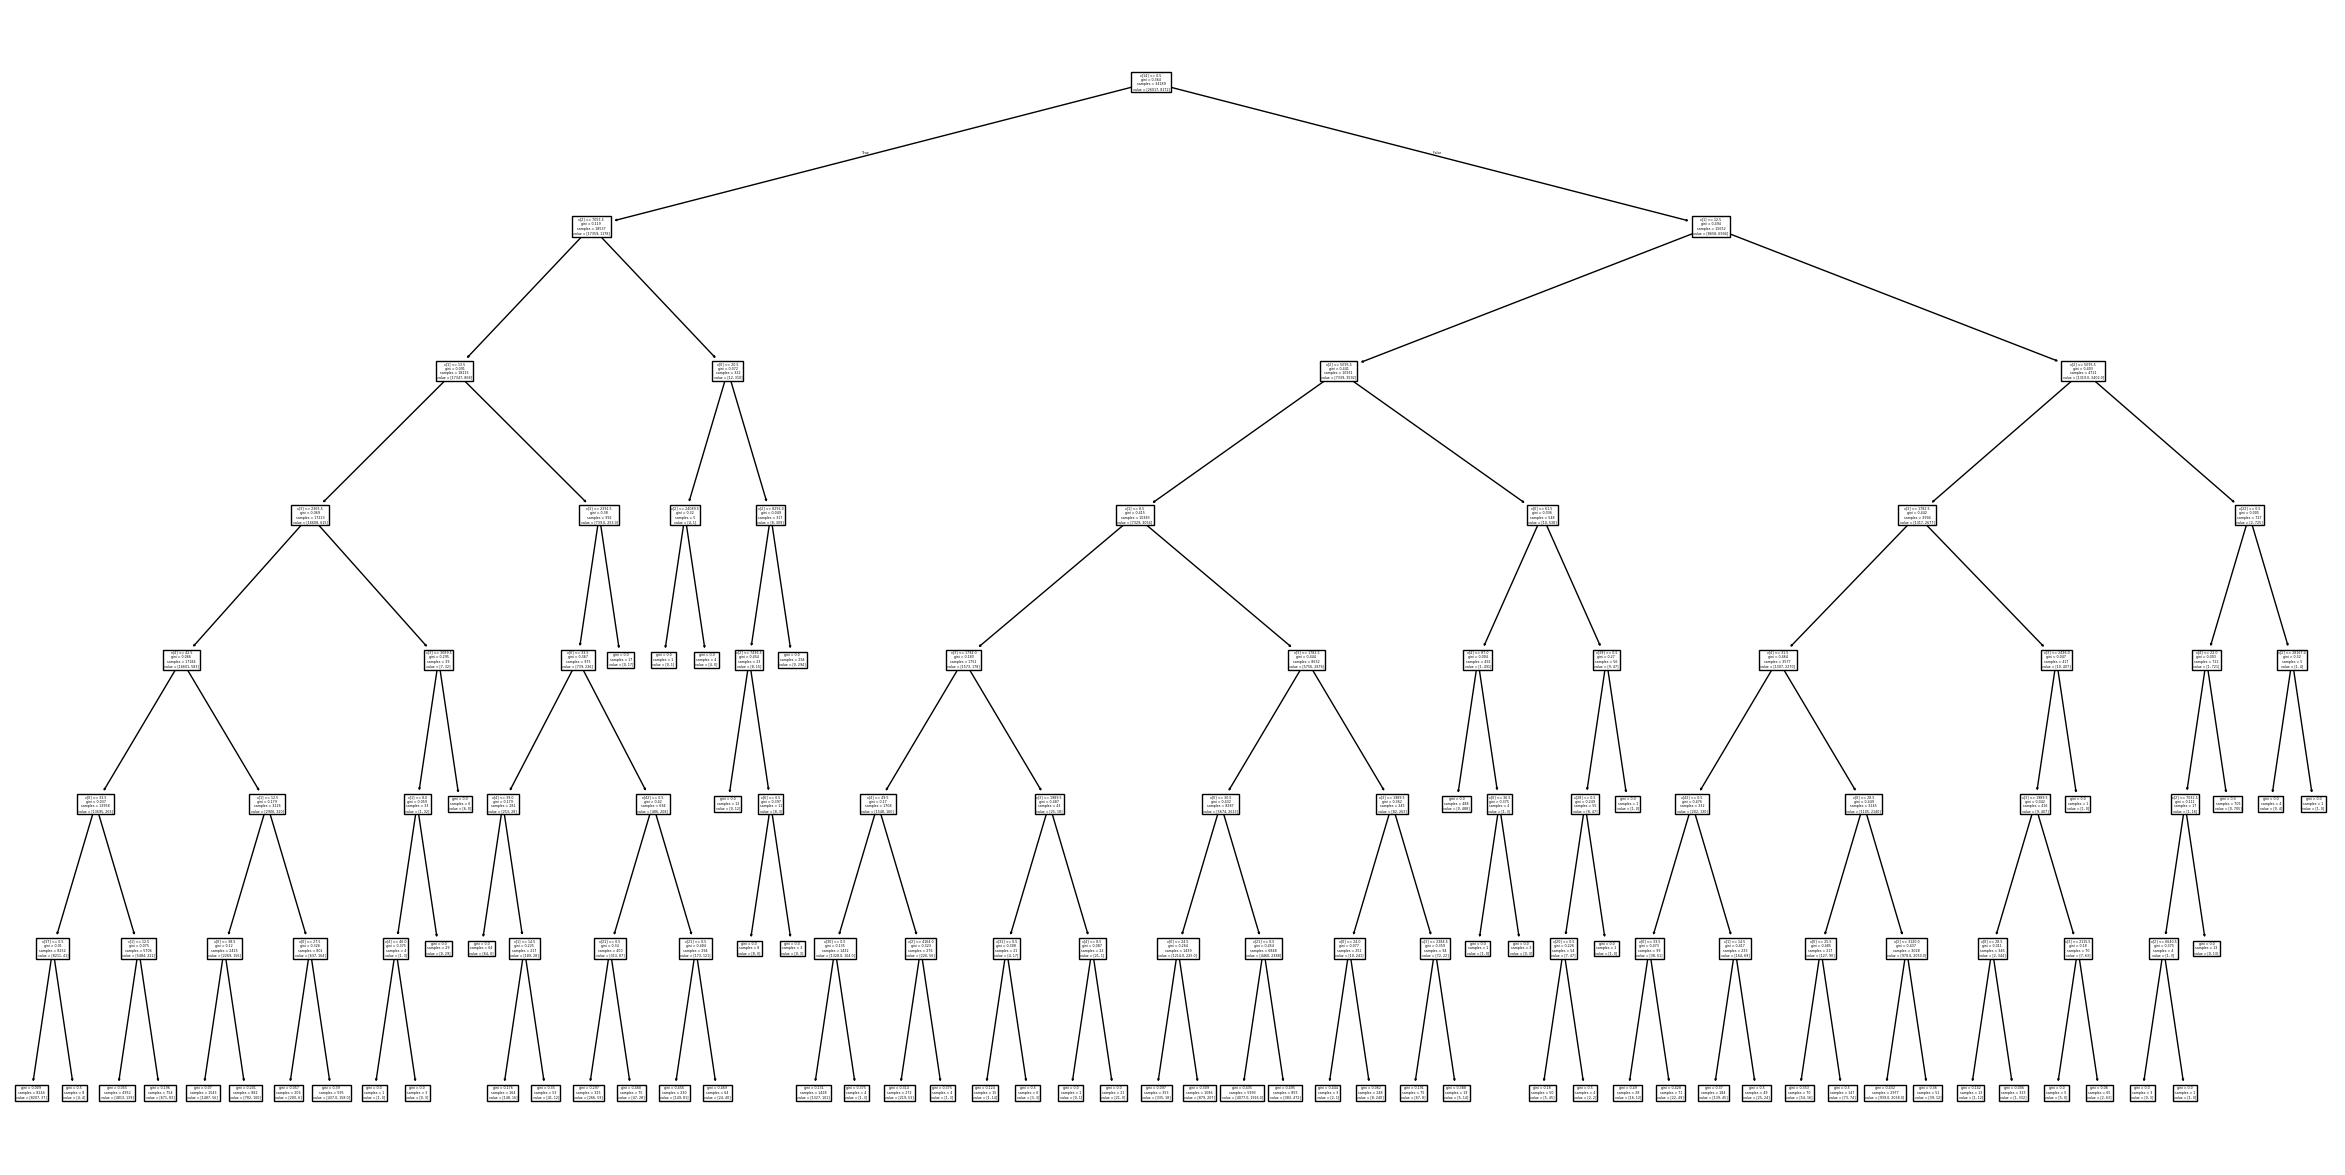

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15))
plot_tree(model)
plt.show()

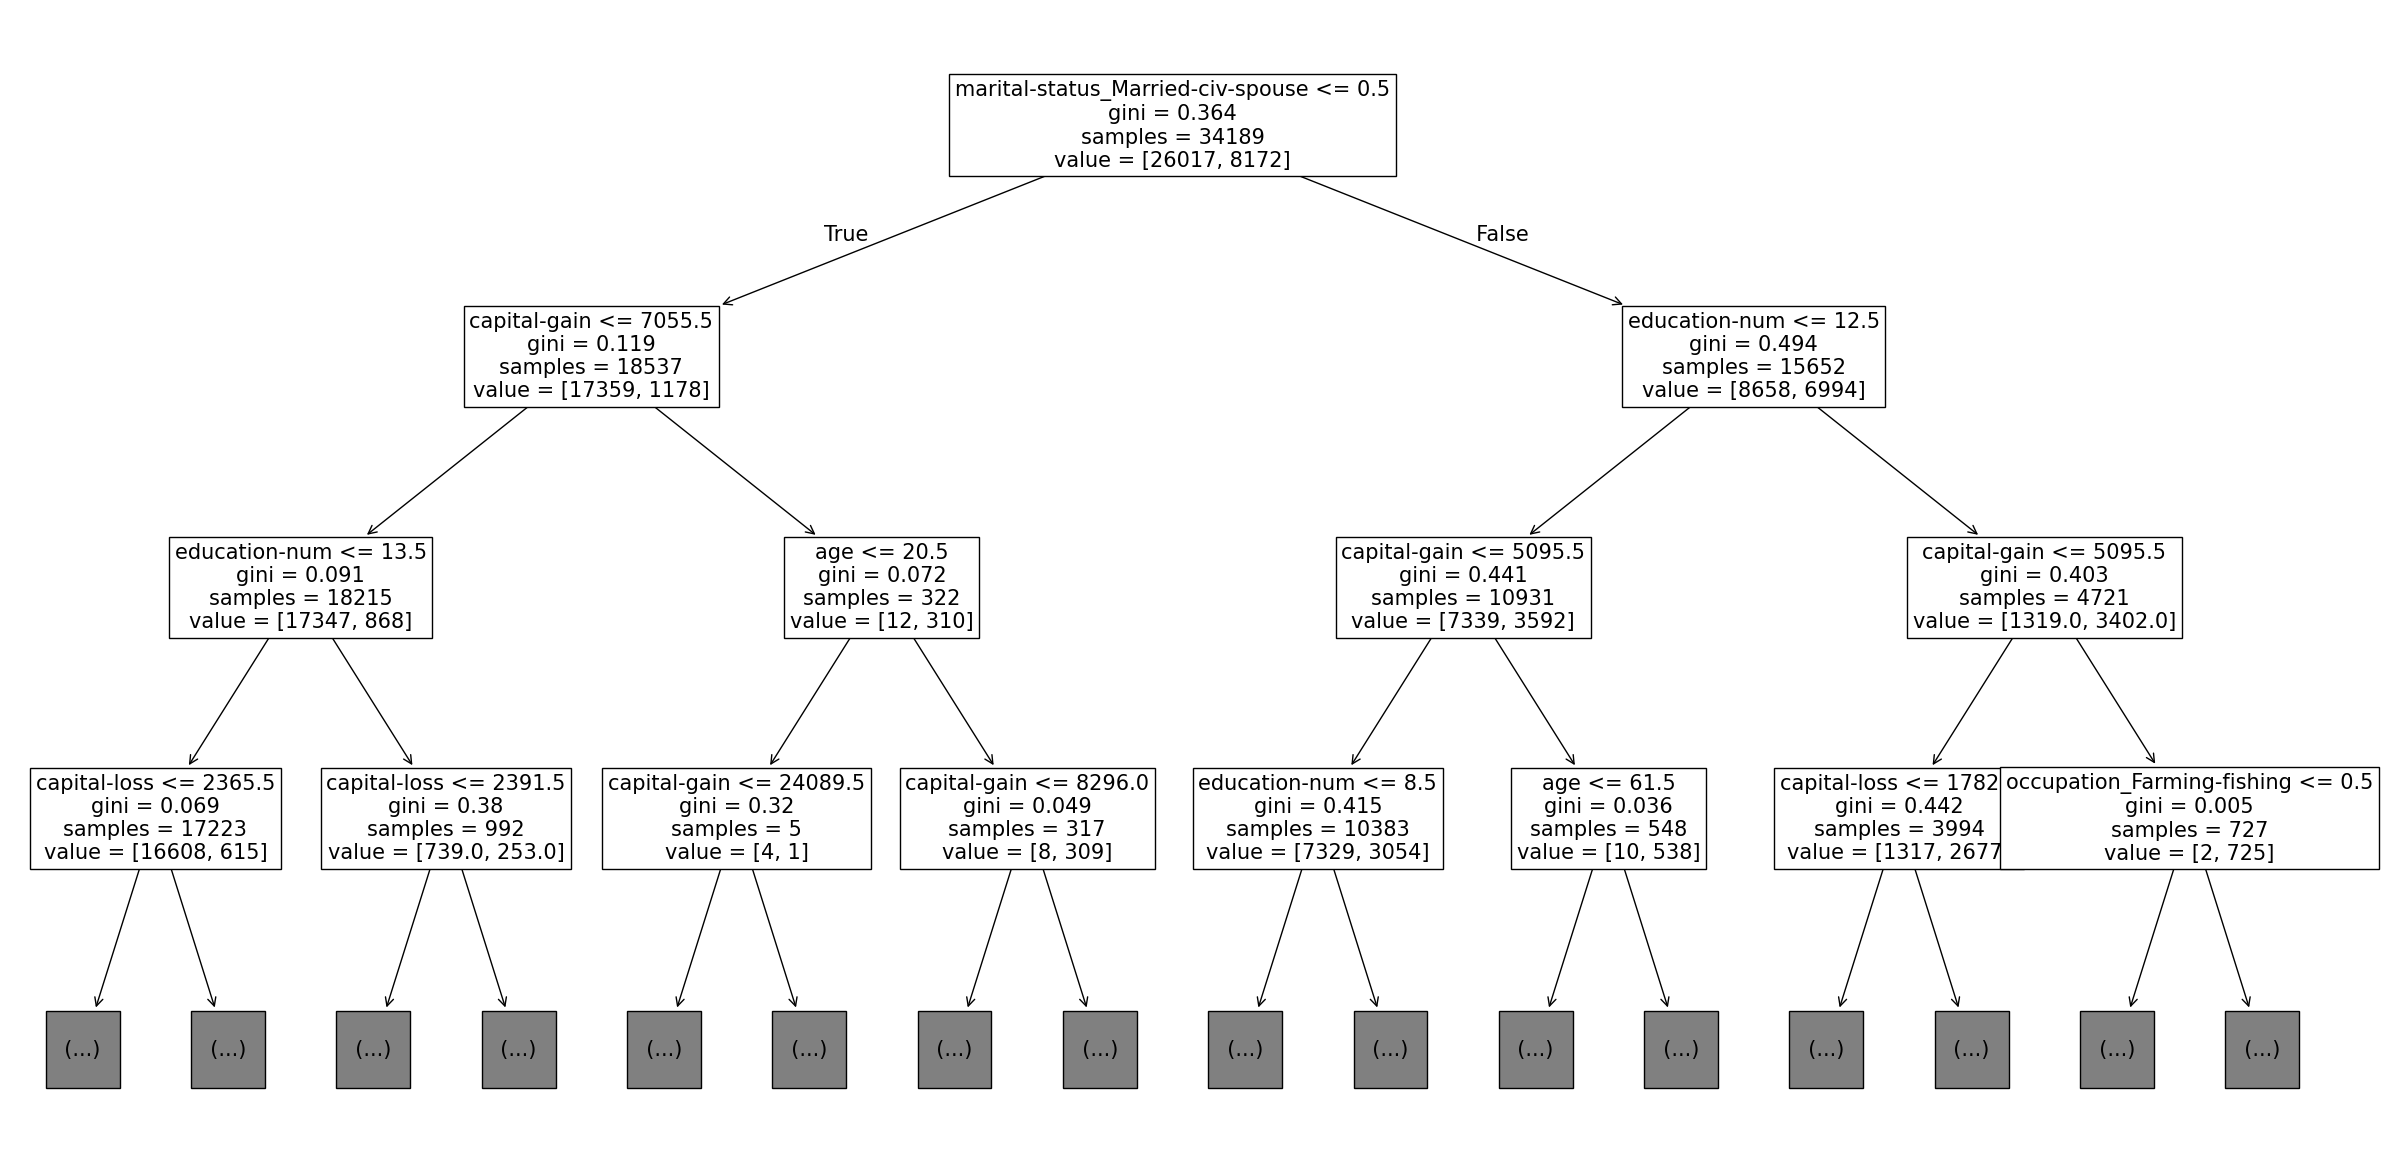

In [71]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(model, max_depth=3, fontsize=15, feature_names=X_train.columns)
plt.show()

# 타이타닉 생존 예측

In [199]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv"
data = pd.read_csv(file_url)
data.shape

(889, 9)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [201]:
data = data.drop(["Name", "Ticket"], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [149]:
# Age 범위 계산하여 적절한 구간 설정하기
age_min = data["Age"].min()
age_max = data["Age"].max()
print(f"\nAge 범위: {age_min:.1f} ~ {age_max:.1f}")


Age 범위: 0.4 ~ 80.0


In [151]:
# 5세 단위로 나이 구간 생성
# 0-5, 5-10, 10-15, ... 식으로 구간 생성
age_bins = np.arange(0, int(age_max) + 6, 5)  # 최대값보다 큰 값까지 포함하기 위해 +6
print(f"생성된 나이 구간: {age_bins}")
# 구간 레이블 만들기 (예: '0-5', '5-10', ...)
age_labels = [f"{i}-{i+5}" for i in age_bins[:-1]]

생성된 나이 구간: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85]


In [152]:
# pd.cut()을 사용하여 나이를 카테고리화
# right=False로 설정하면 구간이 [a, b)가 됨 (a 이상 b 미만)
data["Age_group"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=False)

In [153]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived,Age_group
0,3,male,22.0,1,0,S,0,20-25
1,1,female,38.0,1,0,C,1,35-40
2,3,female,26.0,0,0,S,1,25-30
3,1,female,35.0,1,0,S,1,35-40
4,3,male,35.0,0,0,S,0,35-40


In [202]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [204]:
data["family"] = data["SibSp"] + data["Parch"]
data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived,family
0,3,male,22.0,1,0,S,0,1
1,1,female,38.0,1,0,C,1,1


In [205]:
data.drop(["SibSp", "Parch"], axis=1, inplace=True)
data.head(2)

,Pclass,Sex,Age,Embarked,Survived,family
0,3,male,22.0,S,0,1
1,1,female,38.0,C,1,1


In [206]:
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

In [207]:
data.head()

,Pclass,Age,Survived,family,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,True,False,True
1,1,38.0,1,1,False,False,False
2,3,26.0,1,0,False,False,True
3,1,35.0,1,1,False,False,True
4,3,35.0,0,0,True,False,True


In [208]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
mm = RobustScaler()
mm.fit(data)
data["Age"] = mm.transform(data)[:, 1]

In [209]:
data.head()

,Pclass,Age,Survived,family,Sex_male,Embarked_Q,Embarked_S
0,3,-0.461538,0,1,True,False,True
1,1,0.769231,1,1,False,False,False
2,3,-0.153846,1,0,False,False,True
3,1,0.538462,1,1,False,False,True
4,3,0.538462,0,0,True,False,True


In [210]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["Survived"], axis=1), data["Survived"], test_size=0.2, random_state=10
)

In [211]:
for i in range(3, 10):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print("max_depth:", i, 
        ", Train score: ",
        accuracy_score(y_train, train_pred),
        ", Test score: ",
        accuracy_score(y_test, test_pred),
    )

max_depth: 3 , Train score:  0.8270042194092827 , Test score:  0.848314606741573
max_depth: 4 , Train score:  0.8312236286919831 , Test score:  0.848314606741573
max_depth: 5 , Train score:  0.8396624472573839 , Test score:  0.8426966292134831
max_depth: 6 , Train score:  0.8509142053445851 , Test score:  0.8539325842696629
max_depth: 7 , Train score:  0.8635724331926864 , Test score:  0.8539325842696629
max_depth: 8 , Train score:  0.8762306610407876 , Test score:  0.8707865168539326
max_depth: 9 , Train score:  0.8888888888888888 , Test score:  0.8707865168539326


max_depth: 3 , Train score:  0.8284106891701828 , Test score:  0.8426966292134831
max_depth: 4 , Train score:  0.8312236286919831 , Test score:  0.8426966292134831
max_depth: 5 , Train score:  0.8438818565400844 , Test score:  0.848314606741573
max_depth: 6 , Train score:  0.8579465541490858 , Test score:  0.848314606741573
max_depth: 7 , Train score:  0.8677918424753868 , Test score:  0.848314606741573
max_depth: 8 , Train score:  0.8790436005625879 , Test score:  0.8651685393258427
max_depth: 9 , Train score:  0.8959212376933896 , Test score:  0.8651685393258427

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)
print(
    "Train score: ",
    accuracy_score(y_train, train_pred),
    "Test score: ",
    accuracy_score(y_test, test_pred),
)

Train score:  0.8424753867791842 Test score:  0.848314606741573


In [194]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)
print(
    "Train score: ",
    accuracy_score(y_train, train_pred),
    "Test score: ",
    accuracy_score(y_test, test_pred),
)

Train score:  0.7988748241912799 Test score:  0.8258426966292135


In [198]:
dir(sklearn.naive_bayes)

['ABCMeta',
 'BaseEstimator',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'Integral',
 'Interval',
 'LabelBinarizer',
 'MultinomialNB',
 'Real',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_n_features',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 '_fit_context',
 'abstractmethod',
 'binarize',
 'check_is_fitted',
 'check_non_negative',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'validate_data',
 'warnings']